<a href="https://colab.research.google.com/github/neuraldl/DLAtypicalSerotoninergicCells/blob/main/Training_synthetic_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# DNN - Conv Syntetic Model - Serotonergic Cell Recognition
Training & Analyzing


## Set Up Loading

In [ ]:
import os
import pandas as pd
from numpy import array
from numpy import hstack
import tensorflow as tf
from tensorflow import keras
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Dropout
from datetime import datetime, timedelta
import IPython
import IPython.display
import sys
# Load the TensorBoard notebook extension
%load_ext tensorboard
from keras.optimizers import Adam
import tensorflow as tf
from sklearn.model_selection import train_test_split
import numpy as np
from tensorflow import keras
from keras import layers
import time
from google.colab import drive
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [ ]:
import tensorflow as tf
tf.__version__

'2.14.0'

## Data Modelling


In [ ]:

# Print iterations progress
def print_progress(iteration, total, prefix='', suffix='', decimals=1, bar_length=100):
    """
    Call in a loop to create terminal progress bar
    @params:
        iteration   - Required  : current iteration (Int)
        total       - Required  : total iterations (Int)
        prefix      - Optional  : prefix string (Str)
        suffix      - Optional  : suffix string (Str)
        decimals    - Optional  : positive number of decimals in percent complete (Int)
        bar_length  - Optional  : character length of bar (Int)
    """
    str_format = "{0:." + str(decimals) + "f}"
    percents = str_format.format(100 * (iteration / float(total)))
    filled_length = int(round(bar_length * iteration / float(total)))
    bar = '█' * filled_length + '-' * (bar_length - filled_length)

    sys.stdout.write('\r%s |%s| %s%s %s' % (prefix, bar, percents, '%', suffix)),

    if iteration == total:
        sys.stdout.write('\n')
    sys.stdout.flush()



In [ ]:
lbs_n = np.load('/content/drive/MyDrive/NEURONDL/DataModel/SingleSpikeA/NSER-DataAugmented/Tot-NSER-Labels-110124.npy')
cls_n = np.load('/content/drive/MyDrive/NEURONDL/DataModel/SingleSpikeA/NSER-DataAugmented/Tot-NSER-Cellulars-110124.npy')
obs_n = np.load('/content/drive/MyDrive/NEURONDL/DataModel/SingleSpikeA/NSER-DataAugmented/Tot-NSER-Observations-110124.npy')

lbs_s = np.load('/content/drive/MyDrive/NEURONDL/DataModel/SingleSpikeA/SER-DataAugmented/Tot-SER-Labels-110124.npy')
cls_s = np.load('/content/drive/MyDrive/NEURONDL/DataModel/SingleSpikeA/SER-DataAugmented/Tot-SER-Cellulars-110124.npy')
obs_s = np.load('/content/drive/MyDrive/NEURONDL/DataModel/SingleSpikeA/SER-DataAugmented/Tot-SER-Observations-110124.npy')

In [ ]:
cls_s.shape, lbs_s.shape, obs_s.shape, cls_n.shape, lbs_n.shape, obs_n.shape

((6675300, 1),
 (6675300, 1),
 (6675300, 160, 2, 1),
 (6025300, 1),
 (6025300, 1),
 (6025300, 160, 2, 1))

## Model Compiling & Training: Continuous Learning

### Continuous Learning and Testing

(33350, 160, 2, 1)
(30100, 160, 2, 1)
(63450, 160, 2, 1)
x_train shape: (44415, 160, 2, 1)
44415 train samples
9518 test samples
ModConvBinNormN20-v195.keras
Loaded Model : ModConvBinNormN20-v194
Epoch 1/25
694/694 [==============================] - 12s 7ms/step - loss: 0.0205 - accuracy: 0.9948 - precision: 0.9948 - recall: 0.9948 - binary_accuracy: 0.9948 - false_positives: 233.0000 - false_negatives: 233.0000 - sensitivity_at_specificity: 1.0000 - val_loss: 0.0046 - val_accuracy: 0.9991 - val_precision: 0.9991 - val_recall: 0.9991 - val_binary_accuracy: 0.9991 - val_false_positives: 9.0000 - val_false_negatives: 9.0000 - val_sensitivity_at_specificity: 1.0000
Epoch 2/25
694/694 [==============================] - 4s 6ms/step - loss: 0.0175 - accuracy: 0.9963 - precision: 0.9963 - recall: 0.9963 - binary_accuracy: 0.9963 - false_positives: 166.0000 - false_negatives: 166.0000 - sensitivity_at_specificity: 1.0000 - val_loss: 0.0070 - val_accuracy: 0.9979 - val_precision: 0.9979 - val_r

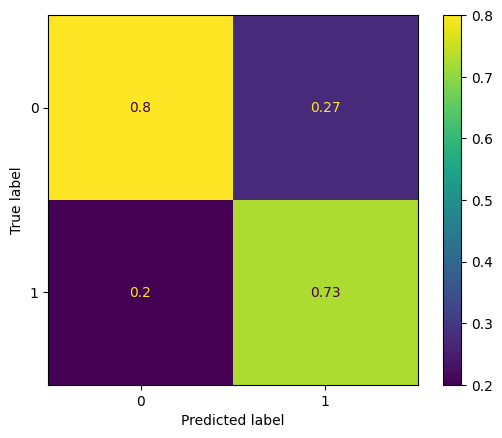

/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3156: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asarray(a).ndim


262/262 [==============================] - 1s 2ms/step
Cell: ['A131031#013'] - NSER - 1 - [0.452, 0.548]
Cell: ['A131031#079'] - NSER - 1 - [0.049, 0.951]
Cell: ['A131031#088'] - NSER - 1 - [0.458, 0.538]
Cell: ['A131031#200'] - SER - 0 - [0.616, 0.384]
Cell: ['A140121#160'] - SER - 0 - [0.628, 0.372]
Cell: ['A140122#028'] - SER - 0 - [0.877, 0.123]
Cell: ['A140122#037'] - NSER - 1 - [0.018, 0.982]
Cell: ['A140122#087'] - NSER - 1 - [0.018, 0.982]
Cell: ['A140212#000'] - NSER - 1 - [0.247, 0.753]
Cell: ['A140212#009'] - NSER - 1 - [0.004, 0.996]
Cell: ['A140212#011'] - NSER - 1 - [0.047, 0.95]
Cell: ['A140212#021'] - NSER - 1 - [0.181, 0.818]
Cell: ['A140212#031'] - SER - 0 - [0.97, 0.03]
Cell: ['A140212#038'] - SER - 0 - [0.989, 0.011]
Cell: ['A140212#040'] - SER - 0 - [0.978, 0.023]
Cell: ['A140212#043'] - SER - 0 - [0.982, 0.018]
Cell: ['A140313#006'] - SER - 0 - [0.941, 0.059]
Cell: ['A140313#014'] - NSER - 1 - [0.15, 0.85]
Cell: ['A140313#016'] - SER - 0 - [0.942, 0.058]
Cell: ['A

/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3156: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asarray(a).ndim


(33350, 160, 2, 1)
(30100, 160, 2, 1)
(63450, 160, 2, 1)
x_train shape: (44415, 160, 2, 1)
44415 train samples
9518 test samples
ModConvBinNormN20-v196.keras
Loaded Model : ModConvBinNormN20-v195
Epoch 1/25
694/694 [==============================] - 7s 7ms/step - loss: 0.1173 - accuracy: 0.9717 - precision: 0.9718 - recall: 0.9717 - binary_accuracy: 0.9717 - false_positives: 1254.0000 - false_negatives: 1258.0000 - sensitivity_at_specificity: 0.9974 - val_loss: 0.0299 - val_accuracy: 0.9905 - val_precision: 0.9905 - val_recall: 0.9905 - val_binary_accuracy: 0.9905 - val_false_positives: 90.0000 - val_false_negatives: 90.0000 - val_sensitivity_at_specificity: 0.9998
Epoch 2/25
694/694 [==============================] - 4s 6ms/step - loss: 0.0481 - accuracy: 0.9850 - precision: 0.9850 - recall: 0.9850 - binary_accuracy: 0.9850 - false_positives: 668.0000 - false_negatives: 666.0000 - sensitivity_at_specificity: 0.9993 - val_loss: 0.0276 - val_accuracy: 0.9903 - val_precision: 0.9903 - va

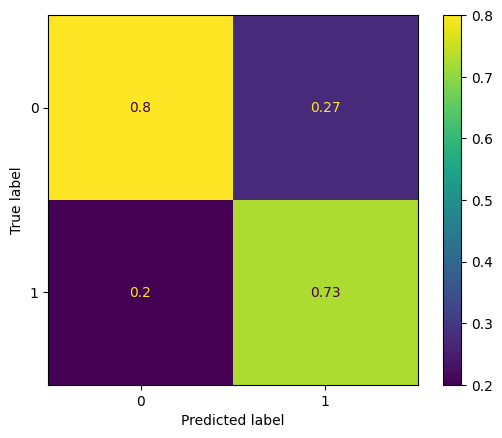

/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3156: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asarray(a).ndim


262/262 [==============================] - 1s 2ms/step
Cell: ['A131031#013'] - NSER - 1 - [0.48, 0.519]
Cell: ['A131031#079'] - NSER - 1 - [0.05, 0.95]
Cell: ['A131031#088'] - SER - 0 - [0.503, 0.499]
Cell: ['A131031#200'] - SER - 0 - [0.661, 0.34]
Cell: ['A140121#160'] - SER - 0 - [0.787, 0.213]
Cell: ['A140122#028'] - SER - 0 - [0.958, 0.042]
Cell: ['A140122#037'] - NSER - 1 - [0.018, 0.982]
Cell: ['A140122#087'] - NSER - 1 - [0.029, 0.971]
Cell: ['A140212#000'] - NSER - 1 - [0.169, 0.831]
Cell: ['A140212#009'] - NSER - 1 - [0.005, 0.995]
Cell: ['A140212#011'] - NSER - 1 - [0.091, 0.909]
Cell: ['A140212#021'] - NSER - 1 - [0.159, 0.841]
Cell: ['A140212#031'] - SER - 0 - [0.971, 0.029]
Cell: ['A140212#038'] - SER - 0 - [0.989, 0.011]
Cell: ['A140212#040'] - SER - 0 - [0.974, 0.026]
Cell: ['A140212#043'] - SER - 0 - [0.984, 0.016]
Cell: ['A140313#006'] - SER - 0 - [0.927, 0.073]
Cell: ['A140313#014'] - NSER - 1 - [0.166, 0.834]
Cell: ['A140313#016'] - SER - 0 - [0.932, 0.068]
Cell: ['A

/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3156: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asarray(a).ndim


(33350, 160, 2, 1)
(30100, 160, 2, 1)
(63450, 160, 2, 1)
x_train shape: (44415, 160, 2, 1)
44415 train samples
9518 test samples
ModConvBinNormN20-v197.keras
Loaded Model : ModConvBinNormN20-v196
Epoch 1/25
694/694 [==============================] - 7s 7ms/step - loss: 0.0339 - accuracy: 0.9953 - precision: 0.9953 - recall: 0.9954 - binary_accuracy: 0.9954 - false_positives: 207.0000 - false_negatives: 206.0000 - sensitivity_at_specificity: 1.0000 - val_loss: 0.0033 - val_accuracy: 0.9991 - val_precision: 0.9991 - val_recall: 0.9991 - val_binary_accuracy: 0.9991 - val_false_positives: 9.0000 - val_false_negatives: 9.0000 - val_sensitivity_at_specificity: 1.0000
Epoch 2/25
694/694 [==============================] - 4s 6ms/step - loss: 0.0160 - accuracy: 0.9960 - precision: 0.9959 - recall: 0.9960 - binary_accuracy: 0.9960 - false_positives: 180.0000 - false_negatives: 179.0000 - sensitivity_at_specificity: 0.9997 - val_loss: 0.0035 - val_accuracy: 0.9994 - val_precision: 0.9994 - val_re

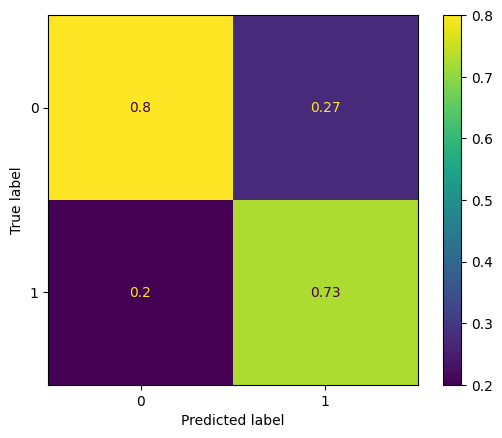

/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3156: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asarray(a).ndim


262/262 [==============================] - 1s 2ms/step
Cell: ['A131031#013'] - SER - 0 - [0.506, 0.494]
Cell: ['A131031#079'] - NSER - 1 - [0.051, 0.949]
Cell: ['A131031#088'] - SER - 0 - [0.537, 0.462]
Cell: ['A131031#200'] - SER - 0 - [0.677, 0.321]
Cell: ['A140121#160'] - SER - 0 - [0.719, 0.281]
Cell: ['A140122#028'] - SER - 0 - [0.941, 0.06]
Cell: ['A140122#037'] - NSER - 1 - [0.019, 0.981]
Cell: ['A140122#087'] - NSER - 1 - [0.03, 0.97]
Cell: ['A140212#000'] - NSER - 1 - [0.174, 0.826]
Cell: ['A140212#009'] - NSER - 1 - [0.007, 0.993]
Cell: ['A140212#011'] - NSER - 1 - [0.097, 0.903]
Cell: ['A140212#021'] - NSER - 1 - [0.176, 0.823]
Cell: ['A140212#031'] - SER - 0 - [0.971, 0.029]
Cell: ['A140212#038'] - SER - 0 - [0.986, 0.014]
Cell: ['A140212#040'] - SER - 0 - [0.978, 0.022]
Cell: ['A140212#043'] - SER - 0 - [0.983, 0.017]
Cell: ['A140313#006'] - SER - 0 - [0.932, 0.068]
Cell: ['A140313#014'] - NSER - 1 - [0.193, 0.805]
Cell: ['A140313#016'] - SER - 0 - [0.929, 0.071]
Cell: ['A

/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3156: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asarray(a).ndim


(33350, 160, 2, 1)
(30100, 160, 2, 1)
(63450, 160, 2, 1)
x_train shape: (44415, 160, 2, 1)
44415 train samples
9518 test samples
ModConvBinNormN20-v198.keras
Loaded Model : ModConvBinNormN20-v197
Epoch 1/25
694/694 [==============================] - 7s 7ms/step - loss: 0.2249 - accuracy: 0.9699 - precision: 0.9698 - recall: 0.9699 - binary_accuracy: 0.9698 - false_positives: 1340.0000 - false_negatives: 1339.0000 - sensitivity_at_specificity: 0.9973 - val_loss: 0.0357 - val_accuracy: 0.9883 - val_precision: 0.9883 - val_recall: 0.9883 - val_binary_accuracy: 0.9883 - val_false_positives: 111.0000 - val_false_negatives: 111.0000 - val_sensitivity_at_specificity: 0.9995
Epoch 2/25
694/694 [==============================] - 5s 7ms/step - loss: 0.0574 - accuracy: 0.9817 - precision: 0.9817 - recall: 0.9817 - binary_accuracy: 0.9817 - false_positives: 812.0000 - false_negatives: 812.0000 - sensitivity_at_specificity: 0.9993 - val_loss: 0.0223 - val_accuracy: 0.9932 - val_precision: 0.9932 - 

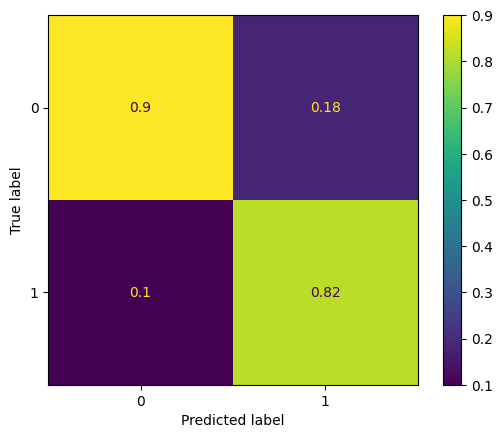

/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3156: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asarray(a).ndim


262/262 [==============================] - 1s 2ms/step
Cell: ['A131031#013'] - SER - 0 - [0.589, 0.411]
Cell: ['A131031#079'] - NSER - 1 - [0.044, 0.956]
Cell: ['A131031#088'] - SER - 0 - [0.53, 0.47]
Cell: ['A131031#200'] - SER - 0 - [0.642, 0.356]
Cell: ['A140121#160'] - SER - 0 - [0.585, 0.414]
Cell: ['A140122#028'] - SER - 0 - [0.951, 0.048]
Cell: ['A140122#037'] - NSER - 1 - [0.019, 0.981]
Cell: ['A140122#087'] - NSER - 1 - [0.032, 0.967]
Cell: ['A140212#000'] - NSER - 1 - [0.173, 0.827]
Cell: ['A140212#009'] - NSER - 1 - [0.006, 0.994]
Cell: ['A140212#011'] - NSER - 1 - [0.024, 0.976]
Cell: ['A140212#021'] - NSER - 1 - [0.202, 0.797]
Cell: ['A140212#031'] - SER - 0 - [0.981, 0.018]
Cell: ['A140212#038'] - SER - 0 - [0.987, 0.013]
Cell: ['A140212#040'] - SER - 0 - [0.982, 0.018]
Cell: ['A140212#043'] - SER - 0 - [0.99, 0.01]
Cell: ['A140313#006'] - SER - 0 - [0.958, 0.042]
Cell: ['A140313#014'] - NSER - 1 - [0.138, 0.862]
Cell: ['A140313#016'] - SER - 0 - [0.936, 0.063]
Cell: ['A1

/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3156: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asarray(a).ndim


(33350, 160, 2, 1)
(30100, 160, 2, 1)
(63450, 160, 2, 1)
x_train shape: (44415, 160, 2, 1)
44415 train samples
9518 test samples
ModConvBinNormN20-v199.keras
Loaded Model : ModConvBinNormN20-v198
Epoch 1/25
694/694 [==============================] - 7s 7ms/step - loss: 0.0241 - accuracy: 0.9948 - precision: 0.9948 - recall: 0.9948 - binary_accuracy: 0.9948 - false_positives: 230.0000 - false_negatives: 230.0000 - sensitivity_at_specificity: 1.0000 - val_loss: 0.0061 - val_accuracy: 0.9986 - val_precision: 0.9986 - val_recall: 0.9986 - val_binary_accuracy: 0.9986 - val_false_positives: 13.0000 - val_false_negatives: 13.0000 - val_sensitivity_at_specificity: 1.0000
Epoch 2/25
694/694 [==============================] - 5s 7ms/step - loss: 0.0143 - accuracy: 0.9960 - precision: 0.9960 - recall: 0.9960 - binary_accuracy: 0.9960 - false_positives: 178.0000 - false_negatives: 178.0000 - sensitivity_at_specificity: 1.0000 - val_loss: 0.0053 - val_accuracy: 0.9988 - val_precision: 0.9988 - val_

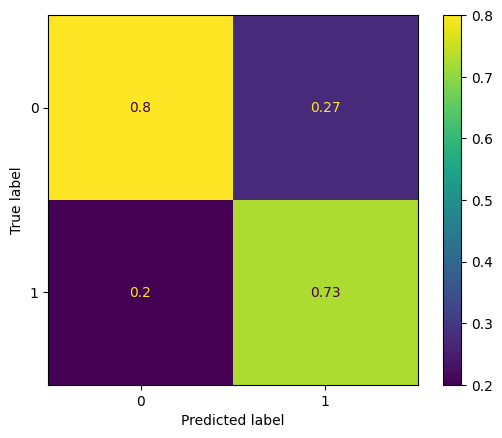

262/262 [==============================] - 1s 2ms/step
Cell: ['A131031#013'] - SER - 0 - [0.581, 0.419]
Cell: ['A131031#079'] - NSER - 1 - [0.047, 0.953]
Cell: ['A131031#088'] - SER - 0 - [0.538, 0.462]
Cell: ['A131031#200'] - SER - 0 - [0.654, 0.346]
Cell: ['A140121#160'] - SER - 0 - [0.545, 0.455]
Cell: ['A140122#028'] - SER - 0 - [0.957, 0.043]
Cell: ['A140122#037'] - NSER - 1 - [0.02, 0.98]
Cell: ['A140122#087'] - NSER - 1 - [0.025, 0.974]
Cell: ['A140212#000'] - NSER - 1 - [0.153, 0.847]
Cell: ['A140212#009'] - NSER - 1 - [0.006, 0.994]
Cell: ['A140212#011'] - NSER - 1 - [0.028, 0.972]
Cell: ['A140212#021'] - NSER - 1 - [0.19, 0.809]
Cell: ['A140212#031'] - SER - 0 - [0.975, 0.025]
Cell: ['A140212#038'] - SER - 0 - [0.984, 0.016]
Cell: ['A140212#040'] - SER - 0 - [0.978, 0.022]
Cell: ['A140212#043'] - SER - 0 - [0.984, 0.015]
Cell: ['A140313#006'] - SER - 0 - [0.953, 0.047]
Cell: ['A140313#014'] - NSER - 1 - [0.115, 0.884]
Cell: ['A140313#016'] - SER - 0 - [0.918, 0.081]
Cell: ['A

In [ ]:
#a = 44
dimN = 160
step_a=50
step_b = 10000
start_m = 20
end_m = 32
dfTotNormScores = pd.DataFrame(columns=['Model','Test loss','Test accuracy','Test Precision','Test Recall','Test Binary Accuracy','Test False Positives','Test False Negatives',' Test Sensitivity At Specificity 0.5'])
for a in range(195,200,1):
  b=0
  obs_s_t = []
  obs_n_t = []
  obs_t = []
  lbs_s_t = []
  lbs_n_t = []
  lbs_t = []
  cls_s_t = []
  cls_n_t = []
  cls_t = []
  while a*step_a + b*step_b  < max(len(obs_s),len(obs_n)):
    if a*step_a + b*step_b  <= len(obs_s):
      obs_s_t = np.append(obs_s_t, obs_s[a*step_a + b*step_b : (a+1)*step_a + b*step_b], axis=0) if len(obs_s_t)>0 else obs_s[a*step_a + b*step_b : (a+1)*step_a + b*step_b]
      lbs_s_t = np.append(lbs_s_t, lbs_s[a*step_a + b*step_b : (a+1)*step_a + b*step_b], axis=0) if len(lbs_s_t)>0 else lbs_s[a*step_a + b*step_b : (a+1)*step_a + b*step_b]
      cls_s_t = np.append(cls_s_t, cls_s[a*step_a + b*step_b : (a+1)*step_a + b*step_b], axis=0) if len(cls_s_t)>0 else cls_s[a*step_a + b*step_b : (a+1)*step_a + b*step_b]
    if a*step_a + b*step_b  <= len(obs_n):
      obs_n_t = np.append(obs_n_t, obs_n[a*step_a + b*step_b : (a+1)*step_a + b*step_b], axis=0) if len(obs_n_t)>0 else obs_n[a*step_a + b*step_b : (a+1)*step_a + b*step_b]
      lbs_n_t = np.append(lbs_n_t, lbs_n[a*step_a + b*step_b : (a+1)*step_a + b*step_b], axis=0) if len(lbs_n_t)>0 else lbs_n[a*step_a + b*step_b : (a+1)*step_a + b*step_b]
      cls_n_t = np.append(cls_n_t, cls_n[a*step_a + b*step_b : (a+1)*step_a + b*step_b], axis=0) if len(cls_n_t)>0 else cls_n[a*step_a + b*step_b : (a+1)*step_a + b*step_b]
    b = b+1
  obs_t = np.append(obs_s_t,obs_n_t, axis = 0)
  lbs_t = np.append(lbs_s_t,lbs_n_t, axis = 0)
  cls_t = np.append(cls_s_t,cls_n_t, axis = 0)
  print(obs_s_t.shape)
  print(obs_n_t.shape)
  print(obs_t.shape)
  # Features and labels
  X = obs_t
  y = lbs_t
  # Splitting the data into training, validation, and test sets
  X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
  X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)
  # Model / data parameters
  num_classes = 2
  print("x_train shape:", X_train.shape)
  print(X_train.shape[0], "train samples")
  print(X_test.shape[0], "test samples")
  # convert class vectors to binary class matrices
  y_train = keras.utils.to_categorical(y_train, num_classes)
  y_test = keras.utils.to_categorical(y_test, num_classes)
  y_val = keras.utils.to_categorical(y_val, num_classes)
  for i in range(start_m,end_m,1):
    keras.backend.clear_session()
    model_name = "ModConvBinNormN"+str(i)+"-v"+str(a)+".keras"
    print(model_name)
    if a == 0:
      input_shape = (dimN,2,1)
      modelConv = keras.Sequential(
          [
              keras.Input(shape=input_shape),
              layers.LayerNormalization(axis=[1]),
              layers.Conv2D(32, kernel_size=(i, 1), activation="relu"),
              layers.MaxPooling2D(pool_size=(2, 1)),
              layers.Conv2D(64, kernel_size=(i, 1), activation="relu"),
              layers.MaxPooling2D(pool_size=(2, 2)),
              layers.Flatten(),
              layers.Dropout(0.5),
              layers.Dense(num_classes, activation="sigmoid"),
          ]
      )
      modelConv.summary()
      modelConv.compile(loss='binary_crossentropy', optimizer="adam", metrics=['accuracy',tf.keras.metrics.Precision(),tf.keras.metrics.Recall(),tf.keras.metrics.BinaryAccuracy(),tf.keras.metrics.FalsePositives(),tf.keras.metrics.FalseNegatives(),tf.keras.metrics.SensitivityAtSpecificity(0.5)])
    else:
      keras.backend.clear_session()
      modelConv = tf.keras.models.load_model("../ModelsDNN/DataAugT/ModConvBinNormN"+str(i)+"-v"+str(a-1)+".keras")
      print('Loaded Model : ModConvBinNormN'+str(i)+'-v'+str(a-1))
      #modelConv.summary()
    batch_size = 64
    epochs = 25
    early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                                      patience=10,
                                                      mode='min')
    log_dir = "../ModelsDNN/logs_article/serot/data-aug-fit/ModConvBinNormN"+str(i)
    tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)
    history = modelConv.fit(X_train, y_train, batch_size=batch_size, epochs=epochs, validation_data=(X_val, y_val), callbacks=[early_stopping,tensorboard_callback])#validation_split=0.1)
    score = modelConv.evaluate(X_test, y_test, verbose=0)
    print("Test loss:", score[0])
    print("Test accuracy:", score[1])
    modelConv.save("../ModelsDNN/DataAugT/ModConvBinNormN"+str(i)+"-v"+str(a)+".keras")
    hist_df = pd.DataFrame(history.history)
    pathH = "../ModelsDNN/DataAugTH/ModConvBinNormN"+str(i)+"-v"+str(a)+"_history.csv"
    hist_df.to_csv(pathH)
    modelConv.summary()
    print("Test loss:", score[0])
    print("Test accuracy:", score[1])
    r = len(dfTotNormScores)
    dfTotNormScores.loc[r] = [model_name, score[0], score[1], score[2], score[3], score[4], score[5], score[6],score[7]]
    dfTotNormScores.to_csv('../ModelsDNN/DataAugTest/DataAugModConvBinNormN_Tot_Scores.csv')
  a = a+1
